In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer


데이터 가공

In [11]:
df = pd.read_excel("aug_nine_var.xlsx")
X = df.iloc[:,1:22]
y = df.iloc[:,22::].to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)


모델 정의

In [12]:
input_layer = tf.keras.layers.Input(shape=(21,))

encoded = tf.keras.layers.Dense(128, activation='relu')(input_layer)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(16, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(3)(encoded)
 
decoded = tf.keras.layers.Dense(3, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(16, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(32, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(64, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(21)(decoded)
 
# autoencoder
autoencoder = tf.keras.Model(input_layer, decoded)
 
# encoder
encoder = tf.keras.Model(input_layer, encoded)

# decoder
encoded_input = tf.keras.layers.Input(shape=(3,))

decoded_layer = autoencoder.layers[6](encoded_input)
decoded_layer = autoencoder.layers[7](decoded_layer)
decoded_layer = autoencoder.layers[8](decoded_layer)
decoded_layer = autoencoder.layers[9](decoded_layer)
decoded_layer = autoencoder.layers[10](decoded_layer)
decoded_layer = autoencoder.layers[11](decoded_layer)

decoder = tf.keras.Model(encoded_input, decoded_layer)
 
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [13]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_11 (Dense)            (None, 128)               2816      
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 3)                 51        
                                                                 
 dense_16 (Dense)            (None, 3)                 12  

In [14]:
X_train = X_train.astype(np.float16)
X_test = X_test.astype(np.float16)

In [15]:
hist = autoencoder.fit(X_train, X_train, 
                batch_size=32, epochs=1000,
                validation_data=(X_test,X_test),
                verbose=1)

Epoch 1/1000
10/10 [==============================] - 1s 34ms/step - loss: 0.2367 - mae: 0.4051 - val_loss: 0.1844 - val_mae: 0.3353
Epoch 2/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1372 - mae: 0.2916 - val_loss: 0.0968 - val_mae: 0.2539
Epoch 3/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0698 - mae: 0.2151 - val_loss: 0.0640 - val_mae: 0.2139
Epoch 4/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0549 - mae: 0.1919 - val_loss: 0.0641 - val_mae: 0.2117
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0535 - mae: 0.1862 - val_loss: 0.0632 - val_mae: 0.2114
Epoch 6/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0521 - mae: 0.1836 - val_loss: 0.0618 - val_mae: 0.2083
Epoch 7/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0514 - mae: 0.1832 - val_loss: 0.0610 - val_mae: 0.2077
Epoch 8/1000
10/10 [==============================] - 0s 7ms/step - loss: 0

ae에서 encoedr와 decoder로 분리하기 위한 모델의 출력값 정의

In [19]:
enc_out = encoder.predict(X)
dec_out = decoder.predict(enc_out)
#decoder를 활용하기 위해 encode 출력을 X로, decode 출력은 y로
enc_X = encoder.predict(X)
enc_y = decoder.predict(enc_X)


enc_X = scaler.fit_transform(enc_X)

13/13 [==============================] - 0s 3ms/step


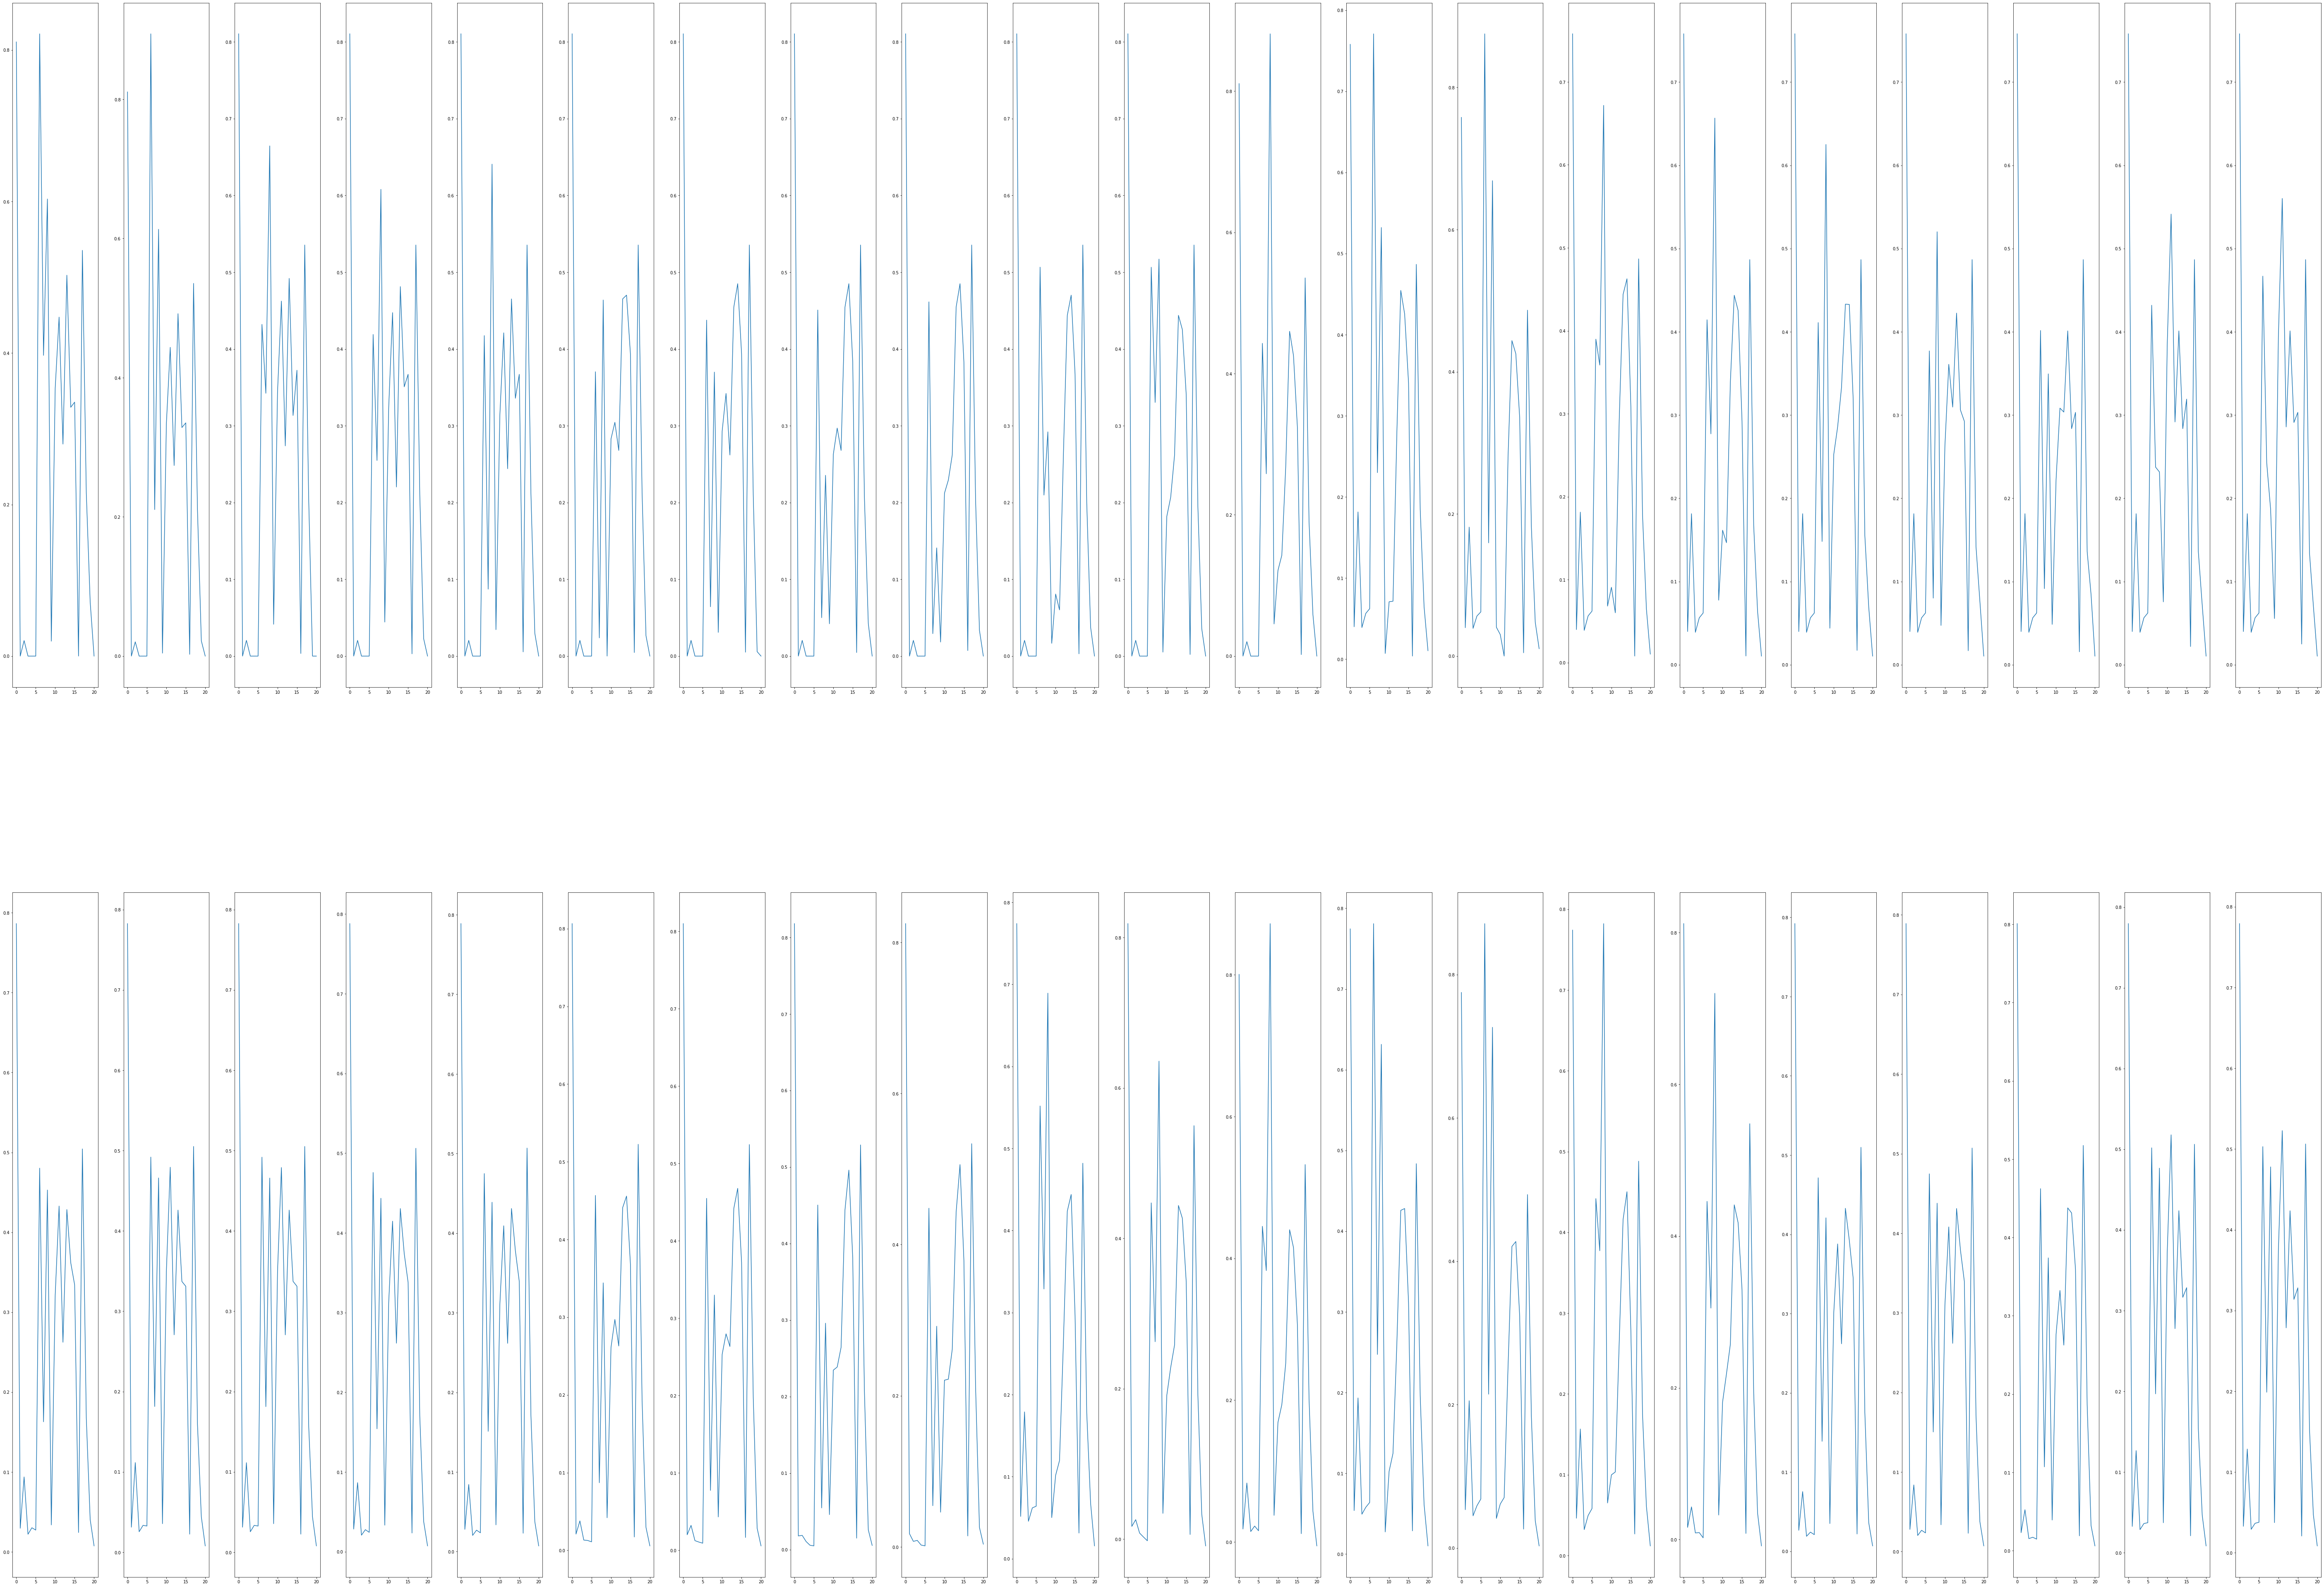

In [20]:
f, axes = plt.subplots(2, 21)
f.set_size_inches((100, 70))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i in range(21):
    axes[0, i].plot(X[i])

for i in range(21):
    axes[1, i].plot(dec_out[i])
    
plt.show()

데이터 가공

In [21]:
enc_out = pd.DataFrame(enc_out)
enc_out.to_excel('enc_out.xlsx')

In [ ]:
enc_X_train, enc_X_test, enc_y_train, enc_y_test = train_test_split(enc_X, enc_y, test_size=0.2, random_state=42,shuffle=False)

In [ ]:
train = pd.DataFrame(X_train)